📌 1. Importing Libraries

We start by importing all necessary libraries for:

- Data manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Time series forecasting (`prophet`)
- Machine learning models and metrics (`sklearn`)

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pyodbc

📂 Load Dataset Files

In [2]:
server = 'ecommerceserv.database.windows.net'
database = 'ecommerceDB'
username = 'medoreda22'
password = '#medoreda#98#'

conn = pyodbc.connect(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

table_names = [
    "categories", "customer_sessions", "customers", "discounts",
    "inventory_movements", "order_details", "orders", "payments",
    "products", "returns", "reviews", "shipping", "suppliers", "wishlists"
]

dataframes = {}

for table in table_names:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, conn)
    globals()[f"df_{table}"] = df 

print(df_categories.head())

C:\Users\CompuMarts\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\CompuMarts\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\CompuMarts\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\CompuMarts\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabas

   id     name                                        description  parent_id
0   1     Part  Win color election her. Idea society understan...        NaN
1   2  Program  Remain great line dog alone either level. Arm ...        NaN
2   3    Large  Table people job civil here. View seat accordi...        NaN
3   4     Hold  Yard call test investment state hundred. Scene...        NaN
4   5   Speech  Forward upon provide. Live world bring if cont...        NaN


🔍 Preview of Categories Data

In [3]:
df_categories.head()

,id,name,description,parent_id
0,1,Part,Win color election her. Idea society understan...,NaN
1,2,Program,Remain great line dog alone either level. Arm ...,NaN
2,3,Large,Table people job civil here. View seat accordi...,NaN
3,4,Hold,Yard call test investment state hundred. Scene...,NaN
4,5,Speech,Forward upon provide. Live world bring if cont...,NaN


Data Types in `categories` Dataset

In [4]:
print(df_categories.dtypes)

id               int64
name            object
description     object
parent_id      float64
dtype: object


first 5 rows of the customer sessions data

In [5]:
df_customer_sessions.head()

,id,customer_id,session_start,session_end,ip_address
0,1,1,2025-01-10 03:19:52,2025-01-10 04:17:52,180.254.129.172
1,2,1,2025-03-03 11:17:21,2025-03-03 11:24:21,19.62.206.54
2,3,1,2025-03-28 00:52:42,2025-03-28 01:46:42,193.28.97.70
3,4,1,2025-03-30 20:30:35,2025-03-30 21:50:35,24.110.203.249
4,5,1,2025-01-09 10:42:49,2025-01-09 11:49:49,5.208.17.212


Data types of customer sessions columns

In [6]:
df_customer_sessions.dtypes

id                        int64
customer_id               int64
session_start    datetime64[ns]
session_end      datetime64[ns]
ip_address               object
dtype: object

Convert session start and end to datetime

In [7]:
df_customer_sessions['session_start'] = df_customer_sessions['session_start'].astype('datetime64[ns]')
df_customer_sessions['session_end'] = df_customer_sessions['session_end'].astype('datetime64[ns]')

In [8]:
df_customer_sessions.dtypes

id                        int64
customer_id               int64
session_start    datetime64[ns]
session_end      datetime64[ns]
ip_address               object
dtype: object

Display first 5 rows of customers data

In [9]:
df_customers.head()

,id,first_name,last_name,email,phone,address,registration_date
0,1,Loretta,Weaver,matthewsstephen@example.net,+10000000001,"8649 Gonzales Stream\r\nJeffreyfort, NV 63120",2025-01-15 18:12:50
1,2,Jennifer,Kelley,xwilson@example.net,+10000000002,"7838 Dustin Skyway\r\nLake Robin, AS 24112",2025-03-17 03:46:07
2,3,Michael,Mcintosh,allisoncollins@example.com,+10000000003,68025 David Squares Apt. 363\r\nLake Josephsta...,2025-04-25 16:08:23
3,4,James,Nguyen,pacesarah@example.com,+10000000004,"PSC 9889, Box 2185\r\nAPO AA 28386",2025-02-19 09:51:26
4,5,Sheila,Cohen,natasha33@example.com,+10000000005,"03530 Howard Knolls Suite 638\r\nHickshaven, A...",2025-04-24 00:30:40


Data types of customers dataframe columns

In [10]:
df_customers.dtypes

id                            int64
first_name                   object
last_name                    object
email                        object
phone                        object
address                      object
registration_date    datetime64[ns]
dtype: object

Convert registration_date to datetime

In [11]:
df_customers['registration_date'] = df_customers['registration_date'].astype('datetime64[ns]')

In [12]:
df_customers.dtypes

id                            int64
first_name                   object
last_name                    object
email                        object
phone                        object
address                      object
registration_date    datetime64[ns]
dtype: object

Display first 5 rows of discounts data

In [13]:
df_discounts.head()

,id,code,percentage,start_date,end_date,is_active,product_id,category_id
0,1,F3178C34,44.16,2025-03-20 11:36:44,2025-04-19 11:36:44,False,NaN,NaN
1,2,F92CDCCB,8.06,2025-04-27 17:09:02,2025-05-27 17:09:02,False,NaN,1.0
2,3,CD0B53F2,36.60,2025-03-17 04:39:57,2025-04-01 21:56:52,True,NaN,7.0
3,4,B15B73F9,12.38,2025-02-25 19:26:42,2025-04-19 06:35:43,True,88.0,8.0
4,5,00A8B505,22.99,2025-05-01 23:50:56,2025-06-02 16:47:43,True,NaN,NaN


Data types of discounts dataframe columns

In [14]:
df_discounts.dtypes

id                      int64
code                   object
percentage            float64
start_date     datetime64[ns]
end_date       datetime64[ns]
is_active                bool
product_id            float64
category_id           float64
dtype: object

Convert start_date and end_date to datetime

In [15]:
df_discounts['start_date'] = df_discounts['start_date'].astype('datetime64[ns]')
df_discounts['end_date'] = df_discounts['end_date'].astype('datetime64[ns]')

In [16]:
df_discounts.dtypes

id                      int64
code                   object
percentage            float64
start_date     datetime64[ns]
end_date       datetime64[ns]
is_active                bool
product_id            float64
category_id           float64
dtype: object

Count of unique values in the is_active column

In [17]:
df_discounts['is_active'].value_counts()

False    33
True     27
Name: is_active, dtype: int64

In [18]:
df_discounts.shape

(60, 8)

In [19]:
df_discounts['is_active'] = df_discounts['is_active'].astype('bool')

In [20]:
df_discounts.dtypes

id                      int64
code                   object
percentage            float64
start_date     datetime64[ns]
end_date       datetime64[ns]
is_active                bool
product_id            float64
category_id           float64
dtype: object

In [21]:
df_discounts['product_id'].value_counts()

88.0     1
34.0     1
524.0    1
387.0    1
298.0    1
348.0    1
559.0    1
421.0    1
157.0    1
398.0    1
184.0    1
468.0    1
579.0    1
186.0    1
420.0    1
575.0    1
326.0    1
526.0    1
102.0    1
522.0    1
474.0    1
385.0    1
472.0    1
9.0      1
11.0     1
347.0    1
Name: product_id, dtype: int64

In [22]:
df_inventory_movements.head()

,id,product_id,quantity,movement_type,movement_date
0,1,38,-3,sale,2025-04-05 09:06:50
1,2,35,-5,sale,2025-03-05 08:27:50
2,3,46,-3,sale,2025-03-05 08:27:50
3,4,36,-1,sale,2025-04-21 21:19:19
4,5,83,-5,sale,2025-04-21 21:19:19


In [23]:
df_inventory_movements.dtypes

id                        int64
product_id                int64
quantity                  int64
movement_type            object
movement_date    datetime64[ns]
dtype: object

In [24]:
df_inventory_movements['movement_date'] = df_inventory_movements['movement_date'].astype('datetime64[ns]')

In [25]:
df_inventory_movements.dtypes

id                        int64
product_id                int64
quantity                  int64
movement_type            object
movement_date    datetime64[ns]
dtype: object

In [26]:
df_inventory_movements['movement_type'].value_counts()

sale    30668
Name: movement_type, dtype: int64

In [27]:
df_order_details.head()

,id,order_id,product_id,quantity,unit_price
0,1,1,38,3,173.95
1,2,2,35,5,23.95
2,3,2,46,3,105.72
3,4,3,36,1,993.24
4,5,3,83,5,416.15


In [28]:
df_order_details.dtypes

id              int64
order_id        int64
product_id      int64
quantity        int64
unit_price    float64
dtype: object

In [29]:
df_orders.head()

,id,customer_id,order_date,total_amount,status
0,1,13,2025-04-05 09:06:50,521.85,shipped
1,2,15,2025-03-05 08:27:50,436.91,processing
2,3,9,2025-04-21 21:19:19,7711.55,cancelled
3,4,19,2025-04-15 02:16:41,7952.82,cancelled
4,5,31,2025-02-11 17:30:12,2785.65,cancelled


In [30]:
df_orders.dtypes

id                       int64
customer_id              int64
order_date      datetime64[ns]
total_amount           float64
status                  object
dtype: object

In [31]:
df_orders['order_date'] = df_orders['order_date'].astype('datetime64[ns]')

In [32]:
df_orders.dtypes

id                       int64
customer_id              int64
order_date      datetime64[ns]
total_amount           float64
status                  object
dtype: object

In [33]:
df_orders['status'].value_counts()

pending       2091
shipped       2086
processing    2028
cancelled     2012
delivered     1983
Name: status, dtype: int64

In [34]:
df_orders['status'] = df_orders['status'].astype('category')

In [35]:
df_orders.dtypes

id                       int64
customer_id              int64
order_date      datetime64[ns]
total_amount           float64
status                category
dtype: object

In [36]:
df_payments.head()

,id,order_id,customer_id,amount,payment_date,payment_method,status
0,1,1,13,521.85,2025-04-05 10:06:50,paypal,completed
1,2,2,15,436.91,2025-03-05 09:27:50,credit_card,completed
2,3,6,8,6179.44,2025-01-17 22:10:53,credit_card,completed
3,4,8,8,2140.72,2025-03-12 05:09:19,credit_card,completed
4,5,9,45,8104.69,2025-01-03 15:50:19,bank_transfer,completed


In [37]:
df_payments.dtypes

id                         int64
order_id                   int64
customer_id                int64
amount                   float64
payment_date      datetime64[ns]
payment_method            object
status                    object
dtype: object

In [38]:
df_payments['payment_date'] = df_payments['payment_date'].astype('datetime64[ns]')

In [39]:
df_payments.dtypes

id                         int64
order_id                   int64
customer_id                int64
amount                   float64
payment_date      datetime64[ns]
payment_method            object
status                    object
dtype: object

In [40]:
df_payments['status'].value_counts()

completed    8188
Name: status, dtype: int64

In [41]:
df_payments['status'] = df_payments['status'].astype('category')

In [42]:
df_payments.dtypes

id                         int64
order_id                   int64
customer_id                int64
amount                   float64
payment_date      datetime64[ns]
payment_method            object
status                  category
dtype: object

In [43]:
df_products.head()

,id,name,description,price,category_id,supplier_id,sku,stock_quantity
0,1,Enterprise-wide stable synergy,Trial eight magazine election even address. Ru...,605.06,8,8,99ef99ca-2d89-4bfd-8fbe-a85b7eb302f7,14
1,2,Synergized uniform contingency,Cold cultural trade bill baby carry. Culture a...,678.15,10,14,8dcbc611-5f75-41d5-a7f1-164bd8de9fd3,17
2,3,Function-based well-modulated intranet,Identify particular between traditional rather...,712.42,9,18,8f29473d-20e5-446c-b366-3fa3676e1be3,6
3,4,Monitored bifurcated database,Century note kind free already own. Film stand...,110.51,10,2,eac97ea6-4bc9-4066-b8e7-58ca560eff9d,26
4,5,Versatile modular info-mediaries,Interesting section everybody. Many forget sit...,285.49,9,6,d82b03ac-f6e5-4c62-a87c-bfe752d8c93b,26


In [44]:
df_products.dtypes

id                  int64
name               object
description        object
price             float64
category_id         int64
supplier_id         int64
sku                object
stock_quantity      int64
dtype: object

In [45]:
df_returns.head()

,id,order_id,return_date,reason,status
0,1,47,2025-03-05 16:37:24,Wrong size,approved
1,2,224,2025-03-23 03:09:13,Defective,approved
2,3,421,2025-02-26 09:34:57,Not as described,rejected
3,4,544,2025-03-31 12:51:11,Changed mind,rejected
4,5,548,2025-02-13 06:09:43,Defective,completed


In [46]:
df_returns.dtypes

id                      int64
order_id                int64
return_date    datetime64[ns]
reason                 object
status                 object
dtype: object

In [47]:
df_returns['return_date'] = df_returns['return_date'].astype('datetime64[ns]')
df_returns['status'] = df_returns['status'].astype('category')

In [48]:
df_returns.dtypes

id                      int64
order_id                int64
return_date    datetime64[ns]
reason                 object
status               category
dtype: object

In [49]:
df_returns['status'].value_counts()

completed    30
rejected     28
pending      24
approved     21
Name: status, dtype: int64

In [50]:
df_reviews.head()

,id,product_id,customer_id,rating,comment,review_date
0,1,1,19,3,Travel information least example. Industry whe...,2025-01-12 06:44:43
1,2,1,2,1,Whose happen recent represent myself son soon ...,2025-02-19 04:51:21
2,3,1,20,5,Charge movie girl care then. Yet whole weight ...,2025-04-15 04:01:41
3,4,1,2,4,Way our discover significant range own. Tell s...,2025-05-03 17:06:02
4,5,1,28,3,Health democratic trip would. Attention eight ...,2025-01-11 11:58:45


In [51]:
df_reviews.dtypes

id                      int64
product_id              int64
customer_id             int64
rating                  int64
comment                object
review_date    datetime64[ns]
dtype: object

In [52]:
df_reviews['review_date'] = df_reviews['review_date'].astype('datetime64[ns]')

In [53]:
df_reviews.dtypes

id                      int64
product_id              int64
customer_id             int64
rating                  int64
comment                object
review_date    datetime64[ns]
dtype: object

In [54]:
df_shipping.head()

,id,order_id,shipping_date,tracking_number,carrier,status
0,1,1,2025-04-06 09:06:50,ab562f03-0539-4407-8f67-21f8a9b405bb,FedEx,shipped
1,2,6,2025-01-18 21:10:53,b2b706fd-4c02-4780-84de-e2f606b88b16,UPS,shipped
2,3,8,2025-03-13 04:09:19,351b3cc7-cb1d-4204-a2cf-ea406a0a3636,UPS,delivered
3,4,9,2025-01-04 14:50:19,edd1a093-5860-4ef5-ab5a-7447ed86bc28,DHL,delivered
4,5,11,2025-03-17 21:32:52,a7151ffa-d439-45e8-8800-999d69ad8baa,UPS,shipped


In [55]:
df_shipping.dtypes

id                          int64
order_id                    int64
shipping_date      datetime64[ns]
tracking_number            object
carrier                    object
status                     object
dtype: object

In [56]:
df_shipping['shipping_date'] = df_shipping['shipping_date'].astype('datetime64[ns]')
df_shipping['status'] = df_shipping['status'].astype('category')

In [57]:
df_shipping.dtypes

id                          int64
order_id                    int64
shipping_date      datetime64[ns]
tracking_number            object
carrier                    object
status                   category
dtype: object

In [58]:
df_shipping['carrier'].value_counts()

UPS      1405
FedEx    1340
DHL      1324
Name: carrier, dtype: int64

In [59]:
df_shipping['carrier'] = df_shipping['carrier'].astype('category')

In [60]:
df_shipping.dtypes

id                          int64
order_id                    int64
shipping_date      datetime64[ns]
tracking_number            object
carrier                  category
status                   category
dtype: object

In [61]:
df_suppliers.head()

,id,name,contact_person,email,phone,address
0,1,Sanders Ltd,Jasmine Walsh,phelpsmark@example.net,815-907-4514,"6251 Scott Road\r\nNew Jessica, WY 51999"
1,2,Morrison and Sons,Ryan Hall,julie44@example.com,(781)629-2294x76331,"43339 Berry Creek\r\nSouth Wesley, FM 96891"
2,3,Freeman-Valenzuela,Stephanie Carter,jacksonanne@example.org,001-621-791-1635x225,USS Wood\r\nFPO AE 43157
3,4,Wright-Davis,Kevin Bennett,wallerkurt@example.net,+1-747-674-4399x95476,060 Patricia Extension Suite 705\r\nLesliemout...
4,5,Osborn-Stewart,Carmen Caldwell,csantos@example.com,+1-931-216-9872,"9300 Davis Spurs\r\nAudreyfurt, NM 45047"


In [62]:
df_suppliers.dtypes

id                 int64
name              object
contact_person    object
email             object
phone             object
address           object
dtype: object

In [63]:
df_wishlists.head()

,id,customer_id,product_id,added_date
0,1,9,59,2025-04-03 15:31:59
1,2,9,93,2025-03-28 12:58:07
2,3,9,92,2025-04-02 12:56:17
3,4,9,71,2025-02-25 15:23:08
4,5,9,36,2025-02-10 09:39:25


In [64]:
df_wishlists.dtypes

id                      int64
customer_id             int64
product_id              int64
added_date     datetime64[ns]
dtype: object

In [65]:
df_wishlists['added_date'] = df_wishlists['added_date'].astype('datetime64[ns]')

In [66]:
df_wishlists.dtypes

id                      int64
customer_id             int64
product_id              int64
added_date     datetime64[ns]
dtype: object

Summary of columns with missing values in each dataframe

In [67]:
null_report = []

for name in table_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None:
        null_counts = df.isnull().sum()
        for col, count in null_counts.items():
            if count > 0:
                null_report.append({
                    "DataFrame": df_name,
                    "Column": col,
                    "Null Count": count
                })

null_df = pd.DataFrame(null_report).sort_values(by=["DataFrame", "Null Count"], ascending=[True, False])

print(null_df.to_string(index=False))

    DataFrame      Column  Null Count
df_categories   parent_id          15
 df_discounts category_id          36
 df_discounts  product_id          34


Summary of duplicate rows count in each dataframe

In [68]:
duplicates_report = []

for name in table_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None:
        duplicate_count = df.duplicated().sum()
        duplicates_report.append({
            "DataFrame": df_name,
            "Duplicate_Rows": duplicate_count
        })

duplicates_df = pd.DataFrame(duplicates_report)

if duplicates_df["Duplicate_Rows"].sum() == 0:
    print("No duplicate rows found in any DataFrame.")
else:
    print(duplicates_df.sort_values(by="Duplicate_Rows", ascending=False).to_string(index=False))

No duplicate rows found in any DataFrame.


List of columns in each dataframe

In [69]:
columns_dict = {}
for name in table_names:
    df_name = f"df_{name}"
    df = globals().get(df_name)
    if df is not None and isinstance(df, pd.DataFrame):
        columns_dict[name] = df.columns.tolist()
    else:
        columns_dict[name] = ["[Not Loaded]"]

max_len = max(len(cols) for cols in columns_dict.values())
for key in columns_dict:
    columns_dict[key] += [""] * (max_len - len(columns_dict[key]))

columns_df = pd.DataFrame(columns_dict)
print(columns_df)

    categories customer_sessions          customers    discounts  \
0           id                id                 id           id   
1         name       customer_id         first_name         code   
2  description     session_start          last_name   percentage   
3    parent_id       session_end              email   start_date   
4                     ip_address              phone     end_date   
5                                           address    is_active   
6                                 registration_date   product_id   
7                                                    category_id   

  inventory_movements order_details        orders        payments  \
0                  id            id            id              id   
1          product_id      order_id   customer_id        order_id   
2            quantity    product_id    order_date     customer_id   
3       movement_type      quantity  total_amount          amount   
4       movement_date    unit_price       

Sales Forecasting

Columns used for this : orders, order_details, payments, shipping_date


Goal: Predict future revenue, order volume, or inventory needs

 Rename column 'id' to 'order_id'

In [70]:
df_orders.rename(columns={'id':'order_id'}, inplace = True)
df_orders.head(5)

,order_id,customer_id,order_date,total_amount,status
0,1,13,2025-04-05 09:06:50,521.85,shipped
1,2,15,2025-03-05 08:27:50,436.91,processing
2,3,9,2025-04-21 21:19:19,7711.55,cancelled
3,4,19,2025-04-15 02:16:41,7952.82,cancelled
4,5,31,2025-02-11 17:30:12,2785.65,cancelled


In [71]:
print(df_orders.columns.tolist())
print(df_payments.columns.tolist())

['order_id', 'customer_id', 'order_date', 'total_amount', 'status']
['id', 'order_id', 'customer_id', 'amount', 'payment_date', 'payment_method', 'status']


 Merge orders with payments, convert order_date to datetime, and calculate daily sales

In [72]:
df_orders_payments = pd.merge(df_orders, df_payments, on='order_id')
df_orders_payments['order_date'] = pd.to_datetime(df_orders_payments['order_date'])
daily_sales = df_orders_payments.groupby('order_date')['amount'].sum().reset_index()
daily_sales = daily_sales.sort_values('order_date')

Plotting Monthly Sales Over Time

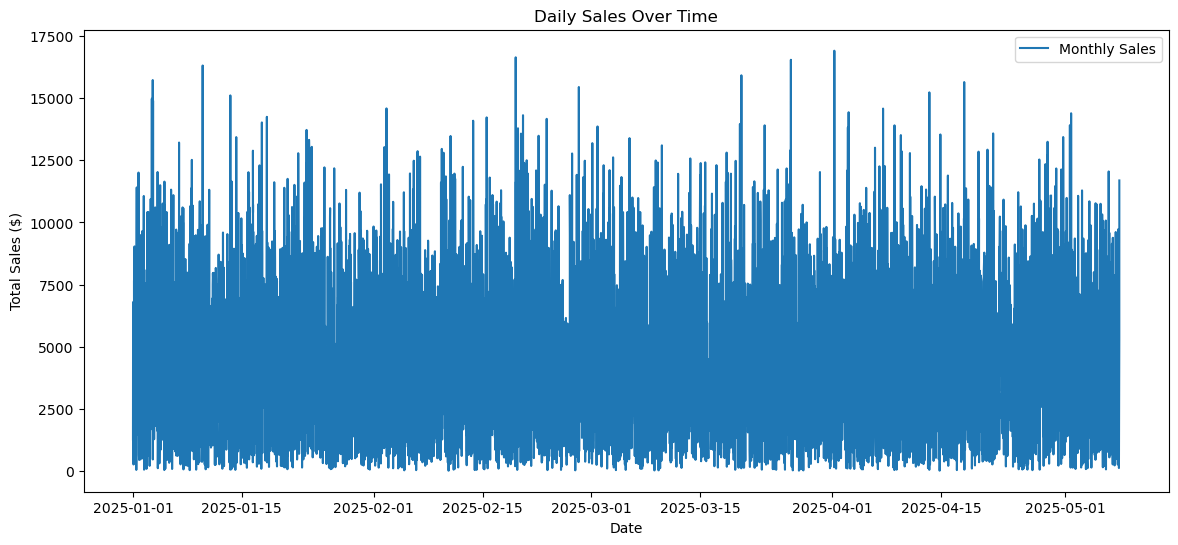

In [73]:
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['order_date'], daily_sales['amount'], label='Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

Forecasting Daily Sales for the Next 30 Days Using Prophet

23:06:55 - cmdstanpy - INFO - Chain [1] start processing
23:06:55 - cmdstanpy - INFO - Chain [1] done processing


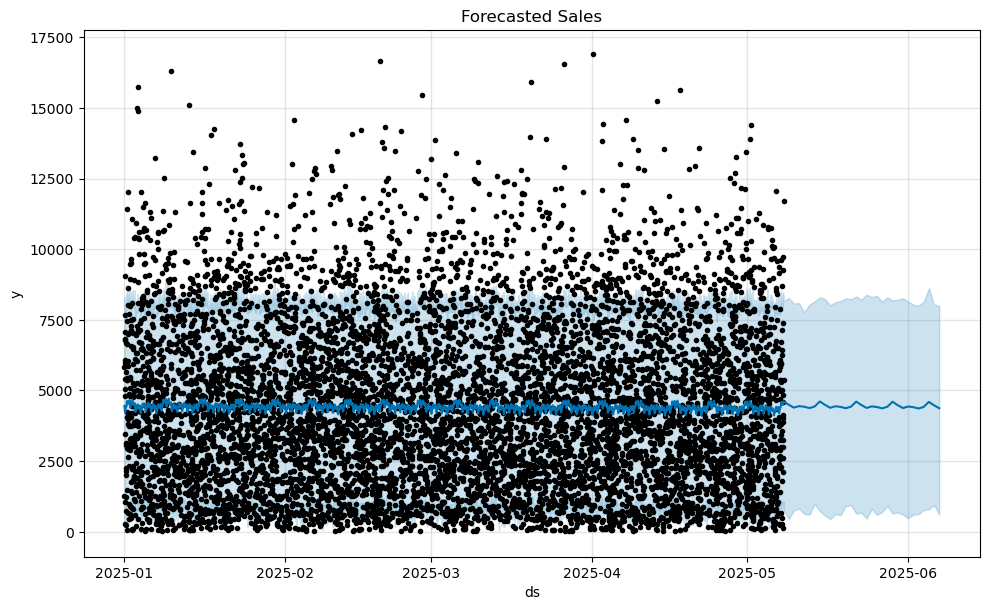

In [74]:
df_prophet = daily_sales.rename(columns={'order_date': 'ds', 'amount': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Forecasted Sales")
plt.show()

Weekly Sales Forecast Using Prophet

23:06:57 - cmdstanpy - INFO - Chain [1] start processing
23:06:57 - cmdstanpy - INFO - Chain [1] done processing


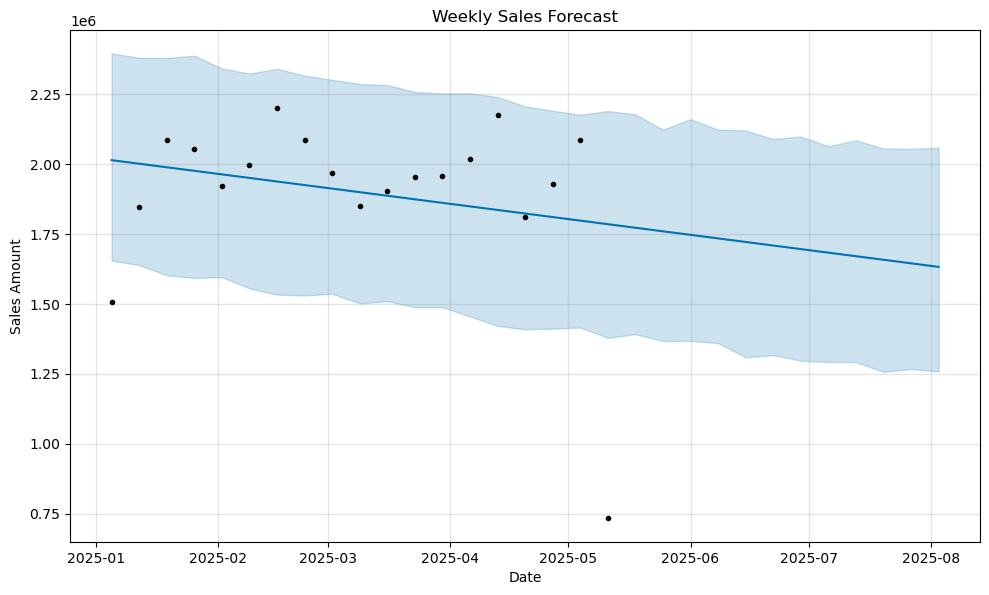

In [75]:
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])
daily_sales.set_index('order_date', inplace=True)
weekly_sales = daily_sales['amount'].resample('W').sum().reset_index()
weekly_sales.rename(columns={'order_date': 'ds', 'amount': 'y'}, inplace=True)
model = Prophet()
model.fit(weekly_sales)
future = model.make_future_dataframe(periods=12, freq='W')

forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

Trend: Sales peaked around mid-2024, declined, and are now stabilizing (or slightly rising).

Forecast: Expected to remain steady (~400k–500k/week) with no drastic growth/decline.

### Calculate the snapshot date as one day after the latest order date


In [76]:
snapshot_date = df_orders['order_date'].max() + pd.DateOffset(days=1)
print(snapshot_date)

2025-05-08 23:18:15


### Calculate RFM metrics for each customer

In [77]:
rfm = df_orders.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'customer_id': 'count',                                  # Frequency
    'total_amount': 'sum'                                    # total_money
})

In [78]:
rfm.columns = ['recency', 'frequency', 'total_money']

In [79]:
rfm

,recency,frequency,total_money
customer_id,,,
1,15,3,13669.67
2,44,2,4164.51
3,21,6,17515.74
4,45,4,24081.19
5,3,6,28486.36
...,...,...,...
246,1,49,174643.55
247,4,53,224328.37
248,3,48,196509.12


### Calculating RFM scores

In [80]:
# Recency score (5 = most recent)
recency_bins = pd.qcut(rfm['recency'], q=5, duplicates='drop')
n_bins = recency_bins.cat.categories.size
rfm['recency_score'] = pd.qcut(rfm['recency'], q=5, labels=list(range(n_bins, 0, -1)), duplicates='drop')

# Frequency score (5 = most frequent)
rfm['frequency_score'] = pd.cut(
    rfm['frequency'],
    bins=[0, 1, 2, 3, 5, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

# Monetary score (5 = highest spending)
monetary_bins = pd.qcut(rfm['total_money'], q=5, duplicates='drop')
n_bins_m = monetary_bins.cat.categories.size
rfm['monetary_score'] = pd.qcut(rfm['total_money'], q=5, labels=list(range(1, n_bins_m + 1)), duplicates='drop')

# Convert to int
rfm['recency_score'] = rfm['recency_score'].astype(int)
rfm['frequency_score'] = rfm['frequency_score'].astype(int)
rfm['monetary_score'] = rfm['monetary_score'].astype(int)

# Combine scores
rfm['rfm_score'] = (
    rfm['recency_score'] +
    rfm['frequency_score'] +
    rfm['monetary_score']
)

### Segment customers based on RFM scores using regex mapping


In [81]:
segmentation_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][3-5]': 'Loyal',
    r'[2-5][2-5][2-5]': 'Potential',
    r'[1-5][1-5][1-5]': 'New',
    r'[1-2][1-2][1-2]': 'At Risk',
    r'[1-2][1-2][1-3]': 'Hibernating',
    r'[1][1-5][1-5]': 'Lost'
}

rfm['segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm['segment'] = rfm['segment'].replace(segmentation_map, regex=True)

In [82]:
rfm

,recency,frequency,total_money,recency_score,frequency_score,monetary_score,rfm_score,segment
customer_id,,,,,,,,
1,15,3,13669.67,1,4,1,6,New
2,44,2,4164.51,1,3,1,5,New
3,21,6,17515.74,1,5,1,7,New
4,45,4,24081.19,1,4,1,6,New
5,3,6,28486.36,4,5,1,10,New
...,...,...,...,...,...,...,...,...
246,1,49,174643.55,4,5,2,11,Potential
247,4,53,224328.37,3,5,4,12,Loyal
248,3,48,196509.12,4,5,3,12,Loyal


### Visualize Customer Segmentation Distribution


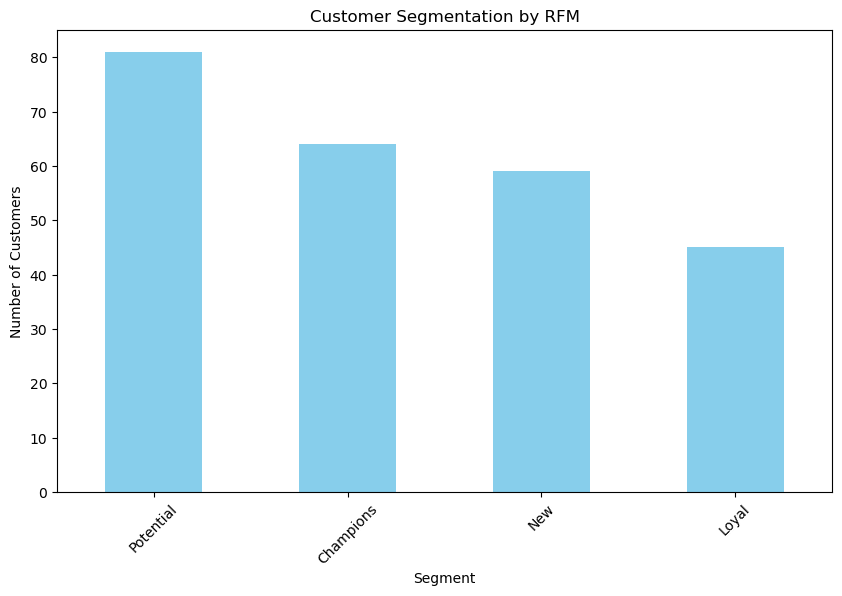

In [83]:
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### Calculate total sales per customer segment


In [84]:
rfm = rfm.reset_index()

segment_sales = df_orders.merge(
    rfm[['customer_id', 'segment']],
    on='customer_id'
)

# Sum sales by segment
sales_by_segment = segment_sales.groupby('segment')['total_amount'].sum().reset_index()

In [85]:
sales_by_segment

,segment,total_amount
0,Champions,16046468.40
1,Loyal,9679720.16
2,New,2864067.61
3,Potential,16353709.85


### Plot Total Sales by Customer Segment (in Millions)


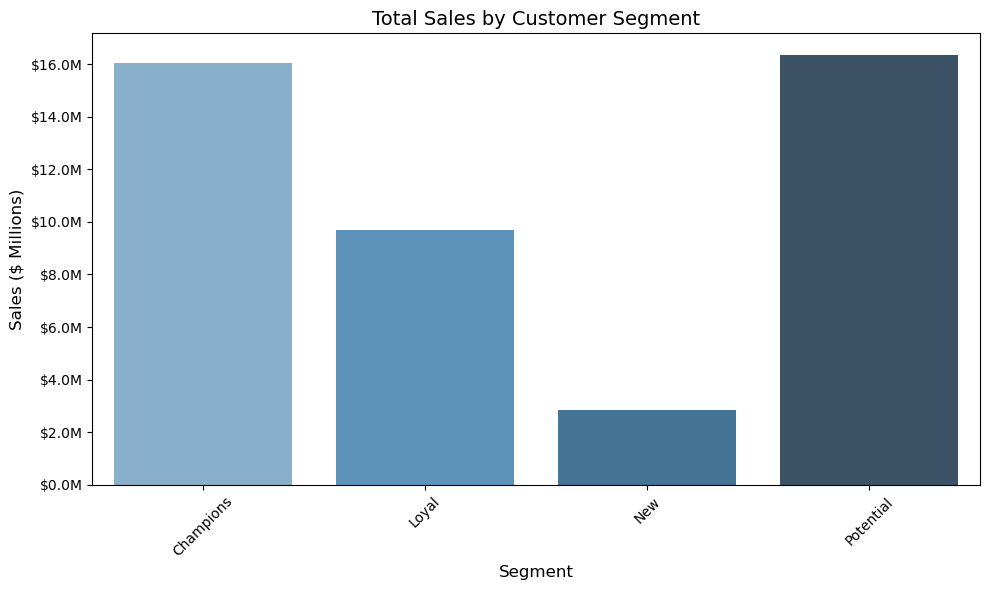

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sales_by_segment,
    x='segment',
    y='total_amount',
    palette='Blues_d'
)

# Format Y-axis to show values in millions
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Total Sales by Customer Segment', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Sales ($ Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [87]:
print(df_shipping.columns)
print(df_orders.columns)
print(df_payments.columns)
print(df_inventory_movements.columns)

Index(['id', 'order_id', 'shipping_date', 'tracking_number', 'carrier',
       'status'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_date', 'total_amount', 'status'], dtype='object')
Index(['id', 'order_id', 'customer_id', 'amount', 'payment_date',
       'payment_method', 'status'],
      dtype='object')
Index(['id', 'product_id', 'quantity', 'movement_type', 'movement_date'], dtype='object')


### Merge shipping, orders, and payments dataframes on `order_id`


In [88]:
df_shipping_merged = (
    df_shipping
    .merge(df_orders[['order_id', 'order_date']], on='order_id', how='left')
    .merge(df_payments[['order_id', 'payment_date']], on='order_id', how='left')
)

In [89]:
df_order_products = df_order_details[['order_id', 'product_id']]

### Join order products with inventory movements by product ID


In [90]:
df_movements_joined = pd.merge(
    df_order_products,
    df_inventory_movements[['product_id', 'movement_date']],
    on='product_id',
    how='left'
)

In [91]:
df_full = pd.merge(
    df_shipping_merged,
    df_movements_joined,
    on='order_id',
    how='left'
)

### Convert date columns to datetime and create delay features


In [92]:
df_full['shipping_date'] = pd.to_datetime(df_full['shipping_date'])
df_full['order_date'] = pd.to_datetime(df_full['order_date'])
df_full['payment_date'] = pd.to_datetime(df_full['payment_date'])
df_full['movement_date'] = pd.to_datetime(df_full['movement_date'])

df_full['order_to_ship'] = (df_full['shipping_date'] - df_full['order_date']).dt.days
df_full['payment_to_ship'] = (df_full['shipping_date'] - df_full['payment_date']).dt.days
df_full['payment_to_inventory'] = (df_full['movement_date'] - df_full['payment_date']).dt.days

# Target label: delayed if shipping takes more than 1 days from payment
df_full['is_delayed'] = (df_full['payment_to_ship'] > 1).astype(int)

## Product Performance Report

In [93]:
df_products_renamed = df_products.rename(columns={'id': 'product_id'})
df_product_perf = pd.merge(df_order_details, df_products_renamed, on='product_id', how='left')
df_product_perf = pd.merge(df_product_perf, df_orders[['order_id', 'order_date', 'status']], on='order_id', how='left')
df_product_perf = pd.merge(df_product_perf, df_reviews[['product_id', 'rating']], on='product_id', how='left')

In [94]:
report = df_product_perf.groupby(['product_id', 'name']).agg(
    total_sales=pd.NamedAgg(column='unit_price', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    review_count=pd.NamedAgg(column='rating', aggfunc='count'),
    order_count=pd.NamedAgg(column='order_id', aggfunc='nunique')
).reset_index()


In [95]:
report_sorted = report.sort_values(by='total_sales', ascending=False)
display(report_sorted.head(10))  # top 10 best-selling products

,product_id,name,total_sales,total_quantity,average_rating,review_count,order_count
193,195,Vision-oriented 3rdgeneration data-warehouse,3409980.66,11374,2.957447,3854,82
369,371,Visionary tangible firmware,2957289.40,7774,2.695652,2990,65
546,548,Mandatory value-added frame,2908811.70,8010,2.844444,3015,67
434,436,Self-enabling national workforce,2789056.80,10080,3.044444,3240,72
477,479,Cross-platform client-driven neural-net,2736436.82,8366,2.808511,2867,61
192,194,Synergistic tangible frame,2730974.88,7632,3.354167,2928,61
267,269,User-centric grid-enabled moratorium,2727597.00,9000,3.480000,3100,62
509,511,Virtual object-oriented paradigm,2650919.04,7920,3.090909,2772,63
241,243,Fully-configurable full-range attitude,2561328.00,8150,2.980000,2800,56
266,268,Re-contextualized hybrid matrices,2535590.75,8820,2.816327,2695,55


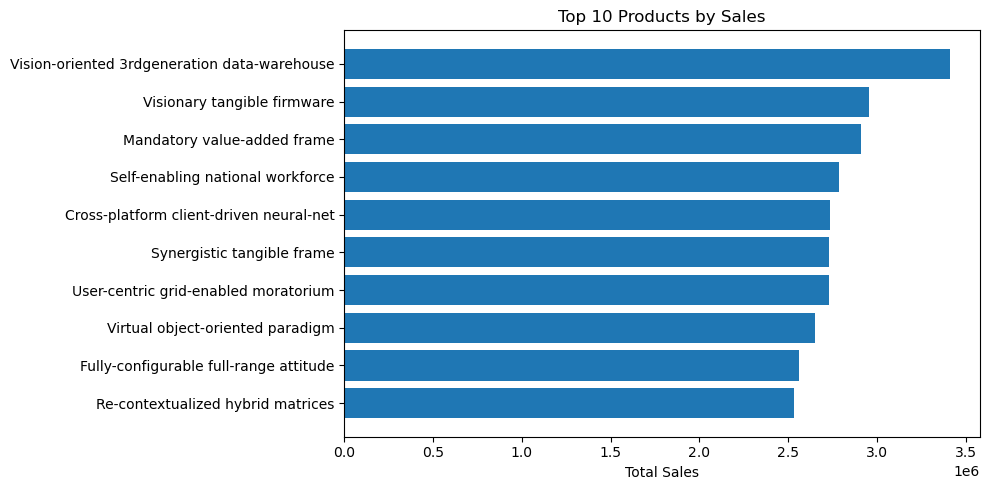

In [96]:
top_products = report_sorted.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_products['name'], top_products['total_sales'])
plt.xlabel("Total Sales")
plt.title("Top 10 Products by Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Calculate Product Order Counts, Return Counts, and Average Ratings


In [97]:
order_count = df_product_perf.groupby('product_id').size().rename('order_count')
return_count = df_product_perf[df_product_perf['status'] == 'returned'].groupby('product_id').size().rename('return_count')
avg_rating = df_product_perf.groupby('product_id')['rating'].mean().rename('average_rating')
product_stats = pd.concat([order_count, return_count, avg_rating], axis=1).fillna(0)
product_stats['return_rate'] = product_stats['return_count'] / product_stats['order_count']

### Visualize Top 10 Products by Return Rate and Average Rating


C:\Users\CompuMarts\AppData\Local\Temp\ipykernel_24896\1481941960.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10['product_id'].astype(str), rotation=45)


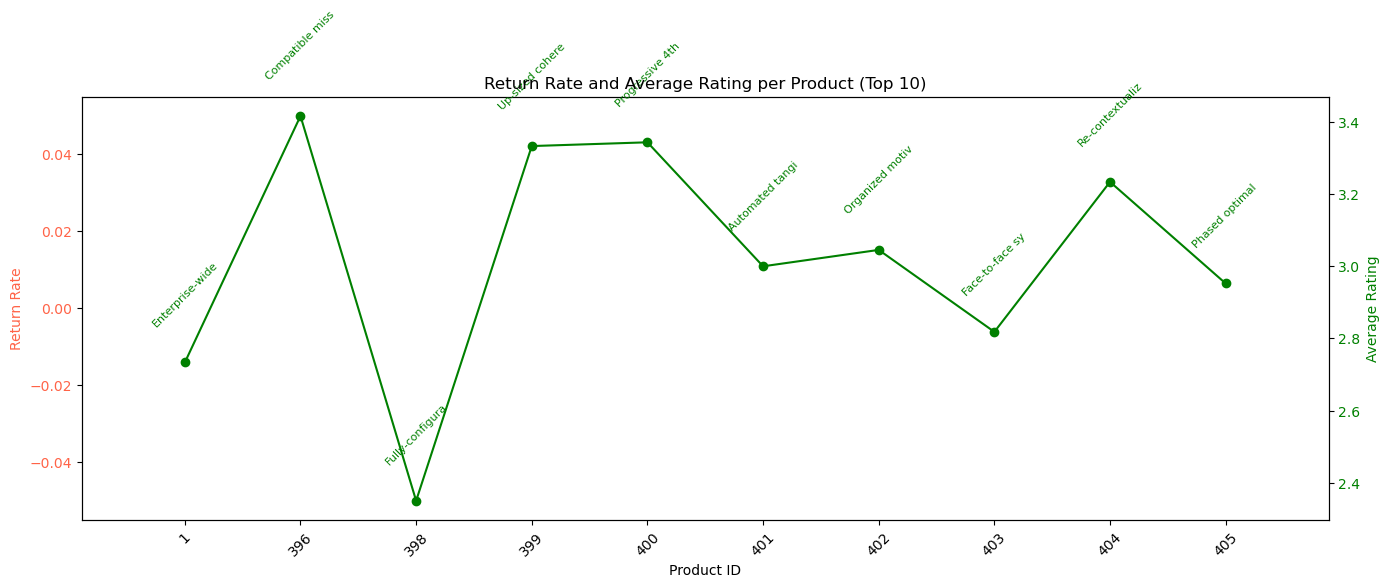

In [98]:
top_10 = product_stats.sort_values('return_rate', ascending=False).head(10).reset_index()
top_10 = top_10.merge(df_products_renamed[['product_id', 'name']], on='product_id', how='left')

fig, ax1 = plt.subplots(figsize=(14,6))

# Bar plot (return rate)
ax1.bar(top_10['product_id'].astype(str), top_10['return_rate'], color='tomato')
ax1.set_ylabel('Return Rate', color='tomato')
ax1.set_xlabel('Product ID')
ax1.tick_params(axis='y', labelcolor='tomato')
ax1.set_xticklabels(top_10['product_id'].astype(str), rotation=45)

# Line plot (average rating)
ax2 = ax1.twinx()
ax2.plot(top_10['product_id'].astype(str), top_10['average_rating'],
         color='green', marker='o', label='Average Rating')

# Annotate each dot with product name
for i, row in top_10.iterrows():
    ax2.text(i, row['average_rating'] + 0.1, row['name'][:15],  # shorten long names
             color='green', fontsize=8, ha='center', rotation=45)

ax2.set_ylabel('Average Rating', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Return Rate and Average Rating per Product (Top 10)')
plt.tight_layout()
plt.show()


## Customer Lifetime Value (CLV)


In [99]:
df_order_details['total_price'] = df_order_details['unit_price'] * df_order_details['quantity']
df_clv = pd.merge(df_order_details, df_orders[['order_id', 'customer_id']], on='order_id', how='left')
customer_clv = df_clv.groupby('customer_id')['total_price'].sum().reset_index()
customer_clv.columns = ['customer_id', 'CLV']

In [100]:
top_10_customers = customer_clv.sort_values(by='CLV', ascending=False).head(10)
print(top_10_customers)

     customer_id        CLV
114          116  329685.39
89            91  308903.76
132          134  307115.89
210          212  302643.41
88            90  297327.19
76            78  293099.74
186          188  290029.65
81            83  287537.22
91            93  287427.50
120          122  287256.94


### Visualize Top 10 Customers by Lifetime Value (CLV)


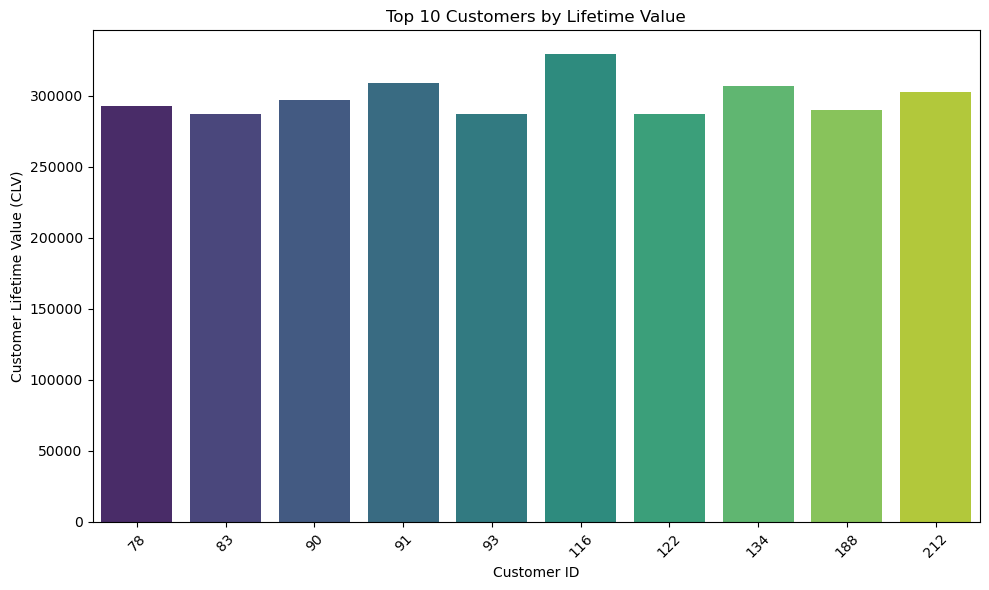

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_customers, x='customer_id', y='CLV', palette='viridis')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis of channels, payment and shipping methods

In [102]:
df_shipping['shipping_date'] = pd.to_datetime(df_shipping['shipping_date'])
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_payments['payment_date'] = pd.to_datetime(df_payments['payment_date'])

df_full = df_shipping.merge(
    df_orders[['order_id', 'order_date', 'status']],
    on='order_id',
    how='left'
).merge(
    df_payments[['order_id', 'payment_method', 'payment_date']],
    on='order_id',
    how='left'
)


### visualize Weekly Number of Shipments

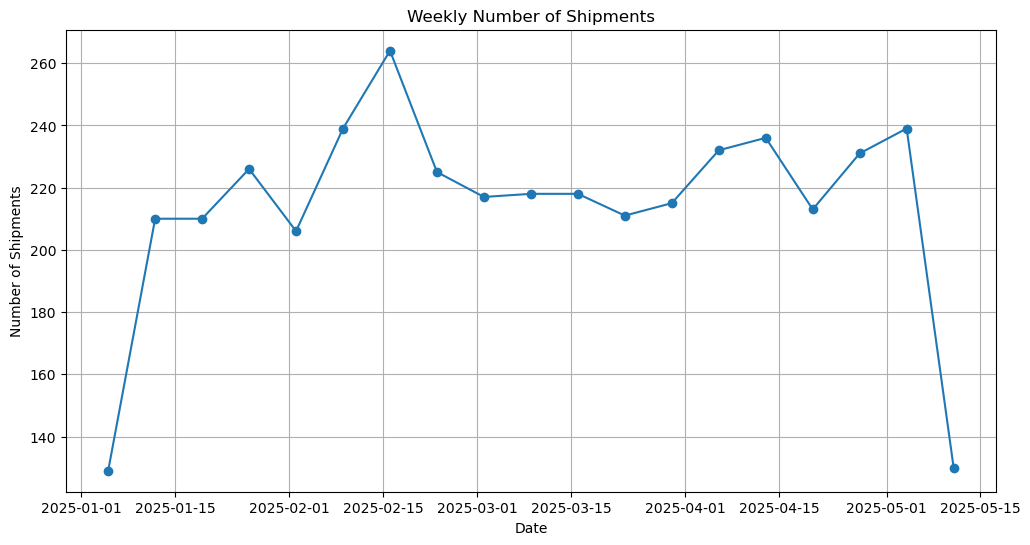

In [103]:
df_shipping['shipping_date'] = pd.to_datetime(df_shipping['shipping_date'])

weekly_shipments = df_shipping.set_index('shipping_date').resample('W').size().rename('shipments').reset_index()

plt.figure(figsize=(12,6))
plt.plot(weekly_shipments['shipping_date'], weekly_shipments['shipments'], marker='o')
plt.title('Weekly Number of Shipments')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.grid(True)
plt.show()


In [104]:
df_full['order_to_ship_days'] = (df_full['shipping_date'] - df_full['order_date']).dt.days
df_full['payment_to_ship_days'] = (df_full['shipping_date'] - df_full['payment_date']).dt.days


In [105]:
shipping_performance = df_full.groupby('carrier').agg({
    'order_to_ship_days': 'mean',
    'payment_to_ship_days': 'mean',
    'order_id': 'count'
}).rename(columns={'order_id': 'num_orders'}).reset_index()

print(shipping_performance)


  carrier  order_to_ship_days  payment_to_ship_days  num_orders
0     DHL                 1.0                   0.0        1324
1   FedEx                 1.0                   0.0        1340
2     UPS                 1.0                   0.0        1405


### Visulaize Average Shipping Time per Week

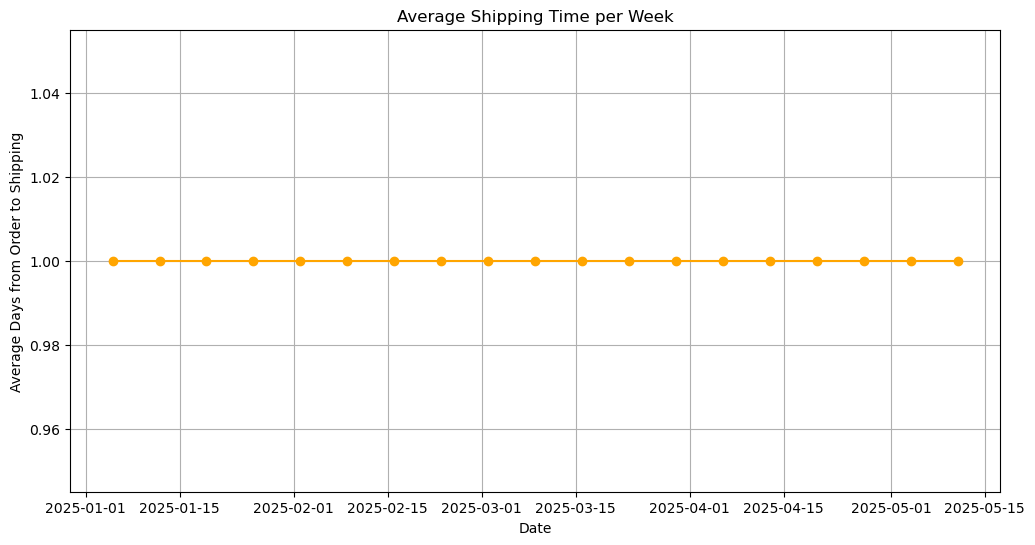

In [106]:
df_full['order_to_ship_days'] = (df_full['shipping_date'] - df_full['order_date']).dt.days

avg_shipping_time_weekly = df_full.set_index('shipping_date').resample('W')['order_to_ship_days'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_shipping_time_weekly['shipping_date'], avg_shipping_time_weekly['order_to_ship_days'], marker='o', color='orange')
plt.title('Average Shipping Time per Week')
plt.xlabel('Date')
plt.ylabel('Average Days from Order to Shipping')
plt.grid(True)
plt.show()


### Forecast of Weekly Shipments

23:07:00 - cmdstanpy - INFO - Chain [1] start processing
23:07:00 - cmdstanpy - INFO - Chain [1] done processing


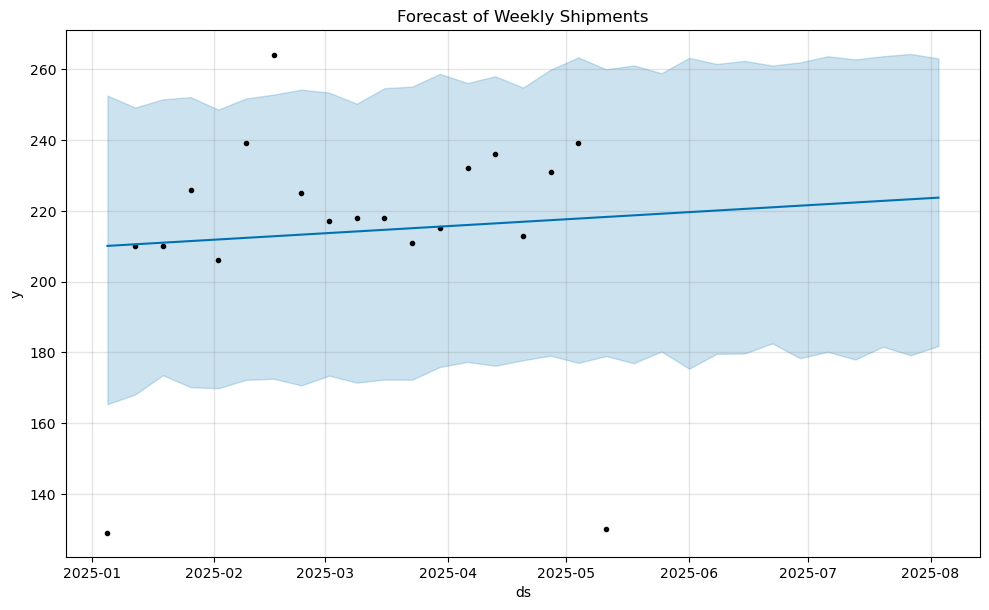

In [107]:
weekly_shipments_prophet = weekly_shipments.rename(columns={'shipping_date':'ds', 'shipments':'y'})

model = Prophet()
model.fit(weekly_shipments_prophet)

future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Forecast of Weekly Shipments')
plt.show()


In [108]:
df_full['is_delayed'] = (df_full['payment_to_ship_days'] > 2).astype(int)

delay_rate_by_carrier = df_full.groupby('carrier')['is_delayed'].mean().reset_index()
delay_rate_by_carrier.rename(columns={'is_delayed': 'delay_rate'}, inplace=True)

print(delay_rate_by_carrier)


  carrier  delay_rate
0     DHL         0.0
1   FedEx         0.0
2     UPS         0.0


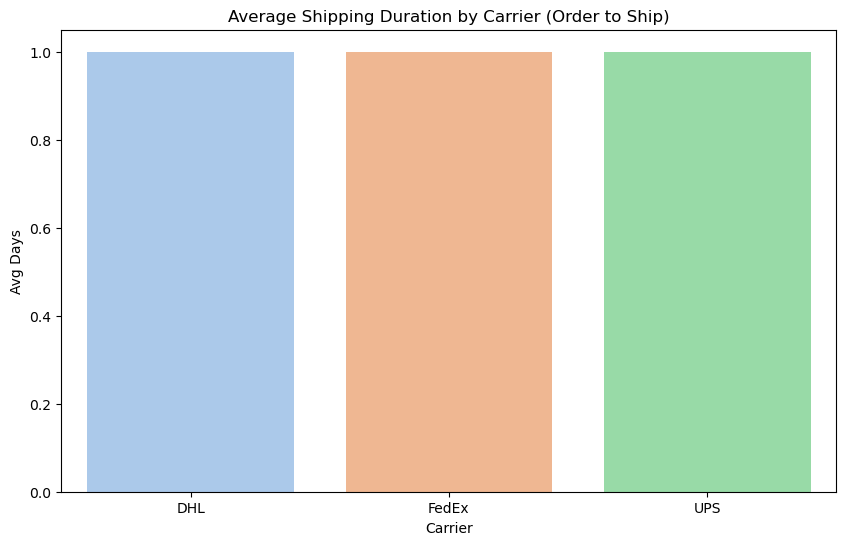

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(data=shipping_performance, x='carrier', y='order_to_ship_days', palette='pastel')
plt.title('Average Shipping Duration by Carrier (Order to Ship)')
plt.xlabel('Carrier')
plt.ylabel('Avg Days')
plt.show()


# Building a model that predicts the CLV (Customer Lifetime Value)

In [110]:
df_customers = df_customers.rename(columns={'id': 'customer_id'})

In [111]:
df_clv = df_orders.groupby("customer_id")["total_amount"].sum().reset_index()
df_clv.columns = ["customer_id", "CLV"]

df_order_stats = df_orders.groupby("customer_id").agg({
    "order_id": "count",
    "total_amount": "mean"
}).reset_index()
df_order_stats.columns = ["customer_id", "num_orders", "avg_order_value"]

df_sessions = df_customer_sessions.groupby("customer_id").agg({
    "session_start": "count"
}).reset_index()
df_sessions.columns = ["customer_id", "num_sessions"]

df_reviews_stats = df_reviews.groupby("customer_id").agg({
    "rating": ["count", "mean"]
}).reset_index()
df_reviews_stats.columns = ["customer_id", "num_reviews", "avg_rating"]

features = df_customers.merge(df_order_stats, on="customer_id", how="left") \
                       .merge(df_sessions, on="customer_id", how="left") \
                       .merge(df_reviews_stats, on="customer_id", how="left") \
                       .merge(df_clv, on="customer_id", how="left")

In [112]:
X = features.drop(columns=["customer_id", "CLV"])
y = features["CLV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
y

0       13669.67
1        4164.51
2       17515.74
3       24081.19
4       28486.36
         ...    
245    174643.55
246    224328.37
247    196509.12
248    204268.51
249    207412.03
Name: CLV, Length: 250, dtype: float64

In [114]:
print(y.isnull().sum())
print(y[y.isnull()])

1
47   NaN
Name: CLV, dtype: float64


#### Here we found out that there are some null values that are affecting out model

In [115]:
non_null_indices = y.notnull()
X = X[non_null_indices]
y = y[non_null_indices]

#### So we dropped the null values

In [116]:
y

0       13669.67
1        4164.51
2       17515.74
3       24081.19
4       28486.36
         ...    
245    174643.55
246    224328.37
247    196509.12
248    204268.51
249    207412.03
Name: CLV, Length: 249, dtype: float64

In [117]:
print(X.dtypes)

first_name                   object
last_name                    object
email                        object
phone                        object
address                      object
registration_date    datetime64[ns]
num_orders                  float64
avg_order_value             float64
num_sessions                  int64
num_reviews                   int64
avg_rating                  float64
dtype: object


In [118]:
X = X.drop(columns=["first_name", "last_name", "email", "address", "phone"], errors="ignore")

In [119]:
X['registration_year'] = X['registration_date'].dt.year
X['registration_month'] = X['registration_date'].dt.month
X['registration_day'] = X['registration_date'].dt.day
X['registration_dayofweek'] = X['registration_date'].dt.dayofweek

X['days_since_registration'] = (pd.Timestamp.now() - X['registration_date']).dt.days

In [120]:
X = X.drop(columns=['registration_date'], errors='ignore')

In [121]:
X.dtypes

num_orders                 float64
avg_order_value            float64
num_sessions                 int64
num_reviews                  int64
avg_rating                 float64
registration_year            int64
registration_month           int64
registration_day             int64
registration_dayofweek       int64
days_since_registration      int64
dtype: object

In [122]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 5995.873289999996


In [124]:
print("Predicted CLV:", model.predict(pd.DataFrame([{
    'num_orders': 10.0,
    'avg_order_value': 85.5,
    'num_sessions': 25.0,
    'num_reviews': 4.0,
    'avg_rating': 4.7,
    'registration_year': 2023.0,
    'registration_month': 6.0,
    'registration_day': 15.0,
    'registration_dayofweek': 3.0,
    'days_since_registration': 330.0
}]))[0])


Predicted CLV: 24300.763800000022


### Actual vs Predicted Customer Lifetime Value (CLV)


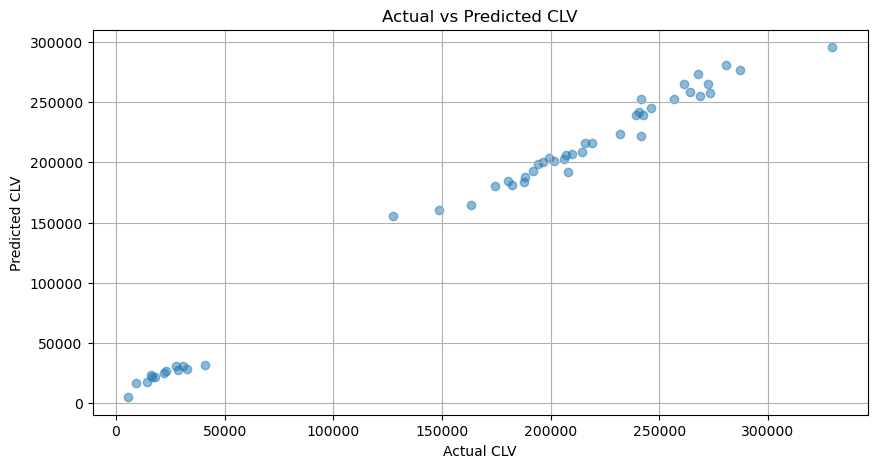

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV")
plt.grid(True)
plt.show()


### Residuals Distribution


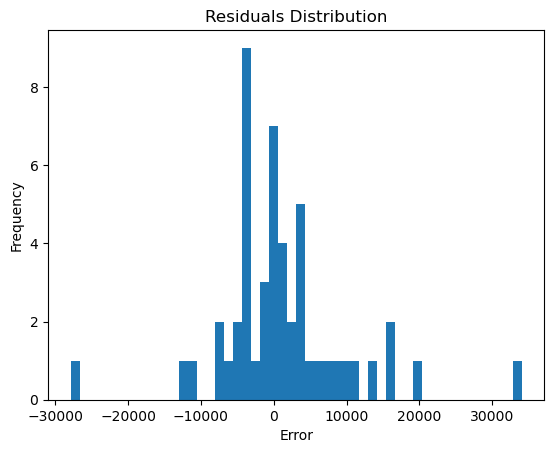

In [126]:
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()
